# Hackathon by United Airlines.
## Submitted by - Rishabh Gupta and Aryan Khokhar.

In [35]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [11]:
calls=pd.read_csv('callsf0d4f5a.csv')
customers=pd.read_csv('customers2afd6ea.csv')
reason=pd.read_csv('reason18315ff.csv')
sentiments=pd.read_csv('sentiment_statisticscc1e57a.csv')

In [12]:
calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [13]:
calls.shape

(71810, 7)

In [14]:
calls.describe()

,call_id,customer_id,agent_id
count,7.181000e+04,7.181000e+04,71810.000000
mean,4.993574e+09,5.004334e+09,564768.278039
std,2.889673e+09,2.884255e+09,257532.362167
min,1.316420e+05,1.197800e+04,102574.000000
25%,2.480013e+09,2.514618e+09,347606.000000
50%,4.989448e+09,4.999664e+09,591778.000000
75%,7.493629e+09,7.509126e+09,786323.000000
max,9.999806e+09,9.999935e+09,993862.000000


In [15]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   call_id                  71810 non-null  int64 
 1   customer_id              71810 non-null  int64 
 2   agent_id                 71810 non-null  int64 
 3   call_start_datetime      71810 non-null  object
 4   agent_assigned_datetime  71810 non-null  object
 5   call_end_datetime        71810 non-null  object
 6   call_transcript          71810 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB


In [16]:
customers.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [17]:
reason.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [18]:
sentiment.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [19]:
# Merging Dataset

df = pd.merge(reason,calls,how='inner',on="call_id")
df1 = pd.merge(df,sentiments,how='inner',on="call_id")
df2 = pd.merge(df1,customers,how='inner',on="customer_id")

In [22]:
df2.sample(5)

,call_id,primary_call_reason,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_name,elite_level_code
12514,1409716708,IRROPS,7588971475,519294,8/5/2024 22:16,8/5/2024 22:21,8/5/2024 22:25,\n\nAgent: Thank you for calling United Airlin...,519294,calm,neutral,0.09,0.04,Ryan Compton,NaN
36947,246219605,Seating,5018758694,524049,8/18/2024 1:17,8/18/2024 1:27,8/18/2024 1:51,\n\nAgent: Thank you for calling United Airlin...,524049,neutral,frustrated,-0.16,0.51,Michael Brandt,0.0
53864,6476555763,Mileage Plus,1663617523,418634,8/25/2024 12:37,8/25/2024 12:41,8/25/2024 12:50,\n\nAgent: Thank you for calling United Airlin...,418634,neutral,calm,-0.14,0.04,Danny Smith,5.0
3404,9290749544,Voluntary Change,2590970606,610271,8/3/2024 9:12,8/3/2024 9:20,8/3/2024 9:27,\n\nAgent: Thank you for calling United Airlin...,610271,calm,frustrated,0.10,0.59,Jennifer Ferguson,0.0
13429,4214587750,IRROPS,400496007,233571,8/6/2024 15:51,8/6/2024 15:57,8/6/2024 16:14,\n\nAgent: Thank you for calling United Airlin...,233571,neutral,neutral,-0.20,0.34,Kathleen Hutchinson,0.0


In [23]:
df3 = df2.drop(['agent_id_y','call_transcript','customer_name'],axis=1)

In [25]:
df3.isnull().sum()

call_id                        0
primary_call_reason            0
customer_id                    0
agent_id_x                     0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
agent_tone                   198
customer_tone                  0
average_sentiment            101
silence_percent_average        0
elite_level_code           23959
dtype: int64

In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66653 entries, 0 to 66652
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_id                  66653 non-null  int64  
 1   primary_call_reason      66653 non-null  object 
 2   customer_id              66653 non-null  int64  
 3   agent_id_x               66653 non-null  int64  
 4   call_start_datetime      66653 non-null  object 
 5   agent_assigned_datetime  66653 non-null  object 
 6   call_end_datetime        66653 non-null  object 
 7   agent_tone               66455 non-null  object 
 8   customer_tone            66653 non-null  object 
 9   average_sentiment        66552 non-null  float64
 10  silence_percent_average  66653 non-null  float64
 11  elite_level_code         42694 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 6.1+ MB


In [27]:
df3['call_start_datetime'] = pd.to_datetime(df3['call_start_datetime'])
df3['call_end_datetime'] = pd.to_datetime(df3['call_end_datetime'])
df3['agent_assigned_datetime'] = pd.to_datetime(df3['agent_assigned_datetime'])

In [28]:
df3['handle_time'] = df3['call_end_datetime']-df3['call_start_datetime']
df3['waiting_time'] = df3['agent_assigned_datetime']-df3['call_start_datetime']
df3['agent_call_duration'] = df3['call_end_datetime']-df3['agent_assigned_datetime']

In [29]:
# Unique values in each categorical column

category_cols = df3[['primary_call_reason','agent_tone','customer_tone']]

for i in category_cols.columns:
    print('Unique values in',i, 'are :')
    print(category_cols[i].unique())
    print('-'*100)

Unique values in primary_call_reason are :
['Voluntary  Cancel' 'Booking' 'IRROPS' 'Upgrade' 'Seating'
 'Mileage   Plus' 'Checkout' 'Voluntary   Change' 'Post Flight' 'Check In'
 'Other  Topics' 'Communications' 'Schedule Change' 'Products & Services'
 'IRROPS  ' 'Digital   Support' 'Seating  ' 'Disability'
 'Unaccompanied Minor' ' Baggage' 'Traveler  Updates' 'Communications  '
 'ETC' 'Upgrade  ' 'Unaccompanied Minor  ' 'Voluntary Change'
 'Voluntary Change  ' 'Checkout  ' 'Mileage Plus' 'Mileage Plus  '
 'Booking  ' 'Baggage  ' 'Post-Flight' 'Post-Flight  ' 'Schedule Change  '
 'Baggage' 'Traveler Updates' 'Voluntary Cancel' 'Check-In'
 'Products and Services' 'Check-In  ' 'Other Topics' 'Other Topics  '
 'ETC  ' 'Disability  ' 'Digital Support' 'Digital Support  '
 'Voluntary Cancel  ' 'Products and Services  ' 'Traveler Updates  '
 'Traveler   Updates' 'Digital  Support' 'Mileage  Plus'
 'Voluntary  Change']
--------------------------------------------------------------------------

In [30]:
# Removing whitespaces

df3['primary_call_reason'] = df3['primary_call_reason'].str.split().str.join(' ')

In [31]:
# Replacing duplicate data

df3['primary_call_reason'].replace("Products and Services","Products & Services",inplace=True)
df3['primary_call_reason'].replace("Check-In","Check In",inplace=True)
df3['primary_call_reason'].replace("Post-Flight","Post Flight",inplace=True)

In [32]:
df3['primary_call_reason'].unique()

array(['Voluntary Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage Plus', 'Checkout', 'Voluntary Change', 'Post Flight',
       'Check In', 'Other Topics', 'Communications', 'Schedule Change',
       'Products & Services', 'Digital Support', 'Disability',
       'Unaccompanied Minor', 'Baggage', 'Traveler Updates', 'ETC'],
      dtype=object)

In [33]:
# Call volume for each day

call_volume_df = df3.groupby(df3['call_start_datetime'].dt.date).size()
call_volume_df = pd.DataFrame(call_volume_df, columns=['number_of_calls'])
call_volume_df.head()

,number_of_calls
call_start_datetime,
2024-07-31,2
2024-08-01,1176
2024-08-02,1254
2024-08-03,4497
2024-08-04,4440


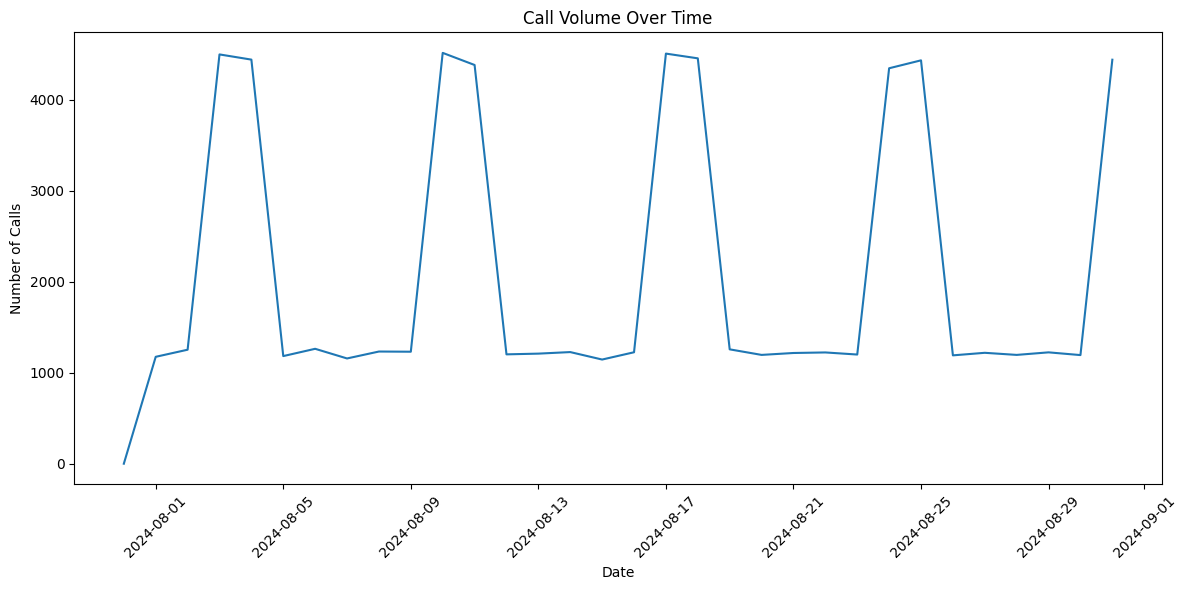

In [36]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(call_volume_df.index, call_volume_df.values)
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.title('Call Volume Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [37]:
# Convert index to datetime objects with day-level frequency
call_volume_df.index = pd.to_datetime(call_volume_df.index)

# Extract weekend data
weekend_data1 = call_volume_df[call_volume_df.index.weekday.isin([5, 6])]  # Saturday (5) and Sunday (6)
weekend_data1

,number_of_calls
call_start_datetime,
2024-08-03,4497
2024-08-04,4440
2024-08-10,4514
2024-08-11,4381
2024-08-17,4506
2024-08-18,4454
2024-08-24,4345
2024-08-25,4432
2024-08-31,4439


In [38]:
bar_df = df3.groupby(df3['primary_call_reason'])['agent_call_duration'].median()
bar_df = bar_df.reset_index(drop=False)
bar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   primary_call_reason  20 non-null     object         
 1   agent_call_duration  20 non-null     timedelta64[ns]
dtypes: object(1), timedelta64[ns](1)
memory usage: 452.0+ bytes


In [39]:
# Converting timedelta to minutes

bar_df['median_call_duration'] = bar_df['agent_call_duration'].dt.seconds // 60
bar_df.drop('agent_call_duration',axis=1,inplace=True)
bar_df

,primary_call_reason,median_call_duration
0,Baggage,4
1,Booking,4
2,Check In,5
3,Checkout,12
4,Communications,9
5,Digital Support,4
6,Disability,3
7,ETC,10
8,IRROPS,9
9,Mileage Plus,11


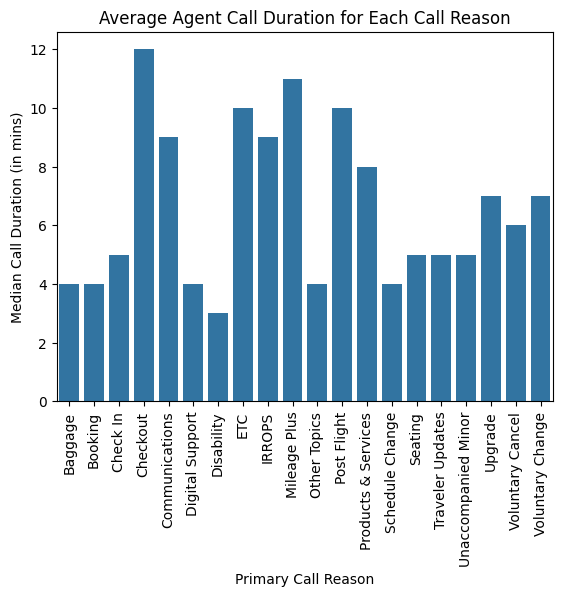

In [40]:
# Barplot showing median call duration for each call reason

#plt.figure(figsize=(10,10))
sns.barplot(x='primary_call_reason', y='median_call_duration', data=bar_df)
plt.xlabel("Primary Call Reason")
plt.ylabel("Median Call Duration (in mins)")
plt.title("Average Agent Call Duration for Each Call Reason")
plt.xticks(rotation=90)
plt.show()

In [41]:
df4 = df3.groupby(df3['primary_call_reason']).size().sort_values(ascending=False)
df4 = df4.reset_index(drop=False)
df4.columns = ['primary_call_reason','Count']
df4.head()

,primary_call_reason,Count
0,IRROPS,13311
1,Voluntary Change,10848
2,Seating,6365
3,Mileage Plus,5851
4,Post Flight,4330


In [42]:
df5 = pd.merge(df4,bar_df,how='inner',on='primary_call_reason')
df5.head()

,primary_call_reason,Count,median_call_duration
0,IRROPS,13311,9
1,Voluntary Change,10848,7
2,Seating,6365,5
3,Mileage Plus,5851,11
4,Post Flight,4330,10


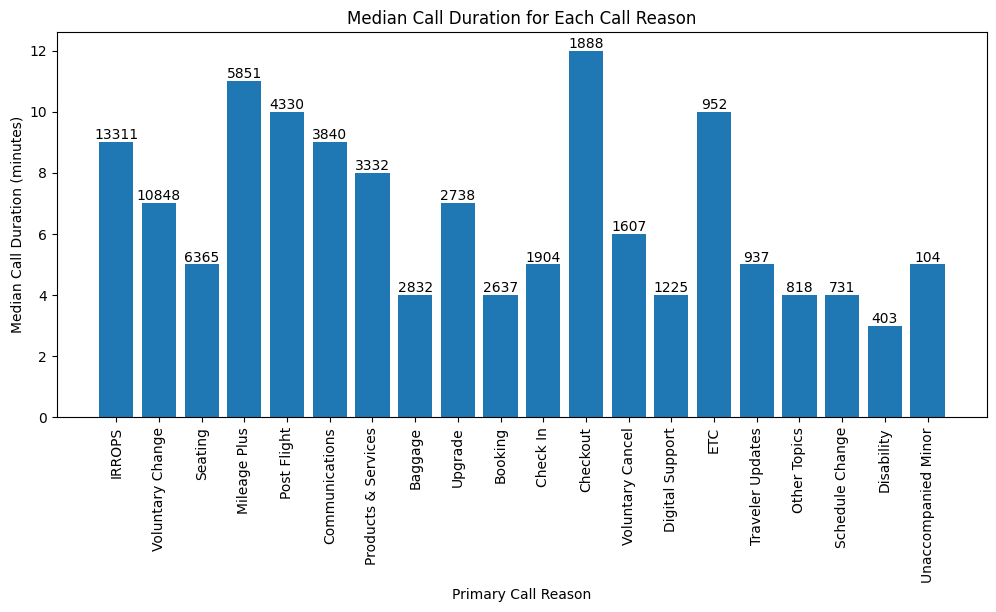

In [120]:
plt.figure(figsize=(12, 5))
bars = plt.bar(df5['primary_call_reason'], df5['median_call_duration'])
plt.xlabel("Primary Call Reason")
plt.ylabel("Median Call Duration (minutes)")
plt.title("Median Call Duration for Each Call Reason")
plt.xticks(rotation=90)

for bar, count in zip(bars, df5['Count']):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.show()

In [45]:
df3.head()

,call_id,primary_call_reason,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,agent_tone,customer_tone,average_sentiment,silence_percent_average,elite_level_code,handle_time,waiting_time,agent_call_duration
0,4667960400,Voluntary Cancel,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,neutral,angry,-0.04,0.39,4.0,0 days 00:38:00,0 days 00:07:00,0 days 00:31:00
1,1122072124,Booking,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,calm,neutral,0.02,0.35,NaN,0 days 00:15:00,0 days 00:03:00,0 days 00:12:00
2,6834291559,IRROPS,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,neutral,polite,-0.13,0.32,NaN,0 days 00:27:00,0 days 00:08:00,0 days 00:19:00
3,2266439882,Upgrade,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,neutral,frustrated,-0.20,0.20,2.0,0 days 00:12:00,0 days 00:05:00,0 days 00:07:00
4,1211603231,Seating,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,neutral,polite,-0.05,0.35,0.0,0 days 00:19:00,0 days 00:10:00,0 days 00:09:00


In [46]:
weekend_data = df3[df3['call_start_datetime'].dt.dayofweek >= 5]

In [47]:
weekend_data.head()

,call_id,primary_call_reason,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,agent_tone,customer_tone,average_sentiment,silence_percent_average,elite_level_code,handle_time,waiting_time,agent_call_duration
2431,1938535073,IRROPS,4440817980,957331,2024-08-03 00:00:00,2024-08-03 00:08:00,2024-08-03 00:17:00,neutral,calm,-0.09,0.27,NaN,0 days 00:17:00,0 days 00:08:00,0 days 00:09:00
2433,8557048035,Products & Services,4948575292,964561,2024-08-03 00:02:00,2024-08-03 00:09:00,2024-08-03 00:17:00,calm,neutral,0.05,0.20,1.0,0 days 00:15:00,0 days 00:07:00,0 days 00:08:00
2434,9743568957,Voluntary Cancel,8298679385,878048,2024-08-03 00:00:00,2024-08-03 00:09:00,2024-08-03 00:15:00,neutral,neutral,-0.12,0.21,1.0,0 days 00:15:00,0 days 00:09:00,0 days 00:06:00
2435,6657981313,Seating,6323277467,488324,2024-08-03 00:01:00,2024-08-03 00:11:00,2024-08-03 00:20:00,neutral,calm,-0.12,0.43,0.0,0 days 00:19:00,0 days 00:10:00,0 days 00:09:00
2436,4016778662,Baggage,4042324340,519057,2024-08-03 00:04:00,2024-08-03 00:12:00,2024-08-03 00:15:00,neutral,frustrated,-0.08,0.03,0.0,0 days 00:11:00,0 days 00:08:00,0 days 00:03:00


In [50]:
weekend_data.drop(columns=['call_id','customer_id','call_start_datetime','agent_assigned_datetime','call_end_datetime'],inplace=True)

In [51]:
weekend_data.head()

,primary_call_reason,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,elite_level_code,handle_time,waiting_time,agent_call_duration
2431,IRROPS,957331,neutral,calm,-0.09,0.27,NaN,0 days 00:17:00,0 days 00:08:00,0 days 00:09:00
2433,Products & Services,964561,calm,neutral,0.05,0.20,1.0,0 days 00:15:00,0 days 00:07:00,0 days 00:08:00
2434,Voluntary Cancel,878048,neutral,neutral,-0.12,0.21,1.0,0 days 00:15:00,0 days 00:09:00,0 days 00:06:00
2435,Seating,488324,neutral,calm,-0.12,0.43,0.0,0 days 00:19:00,0 days 00:10:00,0 days 00:09:00
2436,Baggage,519057,neutral,frustrated,-0.08,0.03,0.0,0 days 00:11:00,0 days 00:08:00,0 days 00:03:00


In [68]:
AHT_agent = weekend_data.groupby(weekend_data['agent_id_x']).agg(
    average_handle_time=('handle_time', 'mean'),
    number_of_calls=('handle_time', 'count')
).reset_index()

In [69]:
AHT_agent

,agent_id_x,average_handle_time,number_of_calls
0,102574,0 days 01:08:00,2
1,103651,0 days 00:19:41.428571428,168
2,106000,0 days 00:19:24.356435643,101
3,107876,0 days 00:24:20,6
4,112609,0 days 00:24:07.500000,8
...,...,...,...
378,981776,0 days 00:18:07.772020725,193
379,981779,0 days 00:18:39.593908629,197
380,982131,0 days 00:19:42.684563758,149
381,992521,0 days 00:23:57.209302325,43


In [70]:
AHT_agent.sort_values('average_handle_time',ascending=True)

,agent_id_x,average_handle_time,number_of_calls
210,616988,0 days 00:09:00,4
48,229129,0 days 00:11:52.500000,8
184,547592,0 days 00:13:00,1
299,814757,0 days 00:14:00,23
238,676262,0 days 00:14:00,8
...,...,...,...
13,136065,0 days 00:43:00,4
16,140146,0 days 00:49:40,3
160,506130,0 days 00:55:00,1
60,255256,0 days 01:04:30,2


In [71]:
AHT_agent['average_handle_time']=AHT_agent['average_handle_time'].dt.components['minutes']

In [72]:
AHT_agent.head()

,agent_id_x,average_handle_time,number_of_calls
0,102574,8,2
1,103651,19,168
2,106000,19,101
3,107876,24,6
4,112609,24,8


In [73]:
AHT_agent.sort_values('average_handle_time',ascending=True)

,agent_id_x,average_handle_time,number_of_calls
60,255256,4,2
0,102574,8,2
210,616988,9,4
48,229129,11,8
184,547592,13,1
...,...,...,...
91,336455,37,3
187,558705,40,2
13,136065,43,4
16,140146,49,3


In [74]:
from sklearn.preprocessing import StandardScaler 

In [75]:
Scaler = StandardScaler()
AHT_Normalized=Scaler.fit_transform(AHT_agent.drop('agent_id_x',axis=1))

In [77]:
AHT_Normalized = pd.DataFrame(AHT_Normalized , columns=['AHT_normal','Calls_normal'])

In [78]:
AHT_Normalized

,AHT_normal,Calls_normal
0,-2.761492,-1.703903
1,-0.011098,1.056679
2,-0.011098,-0.057532
3,1.239081,-1.637383
4,1.239081,-1.604123
...,...,...
378,-0.261134,1.472429
379,-0.261134,1.538949
380,-0.011098,0.740708
381,0.989045,-1.022073


In [80]:
AHT_new= pd.concat([AHT_agent,AHT_Normalized],axis=1)

In [81]:
AHT_new.head()

,agent_id_x,average_handle_time,number_of_calls,AHT_normal,Calls_normal
0,102574,8,2,-2.761492,-1.703903
1,103651,19,168,-0.011098,1.056679
2,106000,19,101,-0.011098,-0.057532
3,107876,24,6,1.239081,-1.637383
4,112609,24,8,1.239081,-1.604123


In [83]:
AHT_new.drop(columns=['average_handle_time','number_of_calls'],axis=1,inplace=True)

In [84]:
AHT_new.head()

,agent_id_x,AHT_normal,Calls_normal
0,102574,-2.761492,-1.703903
1,103651,-0.011098,1.056679
2,106000,-0.011098,-0.057532
3,107876,1.239081,-1.637383
4,112609,1.239081,-1.604123


In [85]:
# calculating performance of each agent
AHT_new['Performance']=((0.4*AHT_new['AHT_normal'])+(0.6*AHT_new['Calls_normal']))

In [86]:
AHT_new.head()

,agent_id_x,AHT_normal,Calls_normal,Performance
0,102574,-2.761492,-1.703903,-2.126939
1,103651,-0.011098,1.056679,0.629568
2,106000,-0.011098,-0.057532,-0.038958
3,107876,1.239081,-1.637383,-0.486797
4,112609,1.239081,-1.604123,-0.466841


In [91]:
AHT_new.shape

(383, 4)

<Axes: ylabel='Performance'>

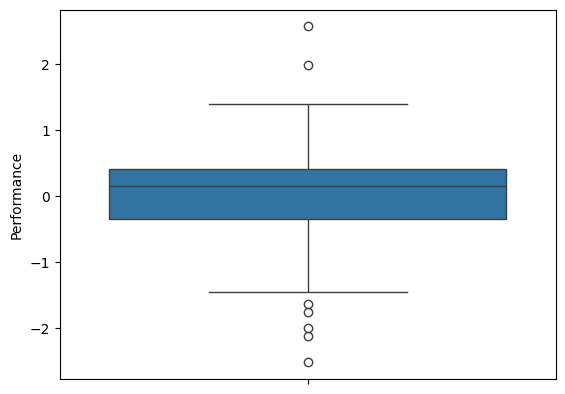

In [87]:
sns.boxplot(AHT_new['Performance'])

In [88]:
AHT_new.describe()

,agent_id_x,AHT_normal,Calls_normal,Performance
count,383.000000,3.830000e+02,3.830000e+02,3.830000e+02
mean,561734.441253,1.159502e-17,4.638007e-18,-6.957011e-18
std,258436.456048,1.001308e+00,1.001308e+00,6.199187e-01
min,102574.000000,-3.761635e+00,-1.720533e+00,-2.526996e+00
25%,342312.000000,-2.611340e-01,-8.890325e-01,-3.533828e-01
50%,575131.000000,-2.611340e-01,2.418082e-01,1.401771e-01
75%,788319.000000,2.389376e-01,7.323935e-01,3.998395e-01
max,993862.000000,8.990191e+00,1.987959e+00,2.563756e+00


In [89]:
# Extracting all the agents who have the performance above median.
Good_performers = AHT_new[AHT_new['Performance']>0.14]

In [90]:
Good_performers

,agent_id_x,AHT_normal,Calls_normal,Performance
1,103651,-0.011098,1.056679,0.629568
5,113217,-0.011098,0.724078,0.430008
7,119952,0.488973,0.191918,0.310740
9,126555,-0.011098,0.291698,0.170580
11,132311,-0.511170,1.738509,0.838638
...,...,...,...,...
377,980508,-0.261134,0.973529,0.479664
378,981776,-0.261134,1.472429,0.779004
379,981779,-0.261134,1.538949,0.818916
380,982131,-0.011098,0.740708,0.439986


In [92]:
# Now getting details of the employees who performed better than 50 percent of employees
GP=pd.merge(Good_performers,weekend_data,how='inner',left_on='agent_id_x',right_on='agent_id_x')

In [93]:
GP

,agent_id_x,AHT_normal,Calls_normal,Performance,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,elite_level_code,handle_time,waiting_time,agent_call_duration
0,103651,-0.011098,1.056679,0.629568,Mileage Plus,calm,frustrated,0.06,0.34,3.0,0 days 00:18:00,0 days 00:07:00,0 days 00:11:00
1,103651,-0.011098,1.056679,0.629568,Voluntary Cancel,frustrated,angry,-0.49,0.13,NaN,0 days 00:21:00,0 days 00:11:00,0 days 00:10:00
2,103651,-0.011098,1.056679,0.629568,IRROPS,calm,angry,0.02,0.38,0.0,0 days 00:40:00,0 days 00:07:00,0 days 00:33:00
3,103651,-0.011098,1.056679,0.629568,Mileage Plus,neutral,frustrated,-0.17,0.44,3.0,0 days 00:57:00,0 days 00:05:00,0 days 00:52:00
4,103651,-0.011098,1.056679,0.629568,Digital Support,neutral,polite,-0.06,0.05,2.0,0 days 00:10:00,0 days 00:07:00,0 days 00:03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28403,993862,-0.261134,0.923639,0.449730,Voluntary Change,neutral,neutral,-0.08,0.18,0.0,0 days 00:20:00,0 days 00:11:00,0 days 00:09:00
28404,993862,-0.261134,0.923639,0.449730,Seating,neutral,calm,-0.08,0.21,0.0,0 days 00:16:00,0 days 00:10:00,0 days 00:06:00
28405,993862,-0.261134,0.923639,0.449730,IRROPS,calm,angry,0.05,0.11,3.0,0 days 00:09:00,0 days 00:06:00,0 days 00:03:00
28406,993862,-0.261134,0.923639,0.449730,Checkout,calm,polite,0.04,0.21,2.0,0 days 00:19:00,0 days 00:11:00,0 days 00:08:00


<Axes: xlabel='average_sentiment', ylabel='Density'>

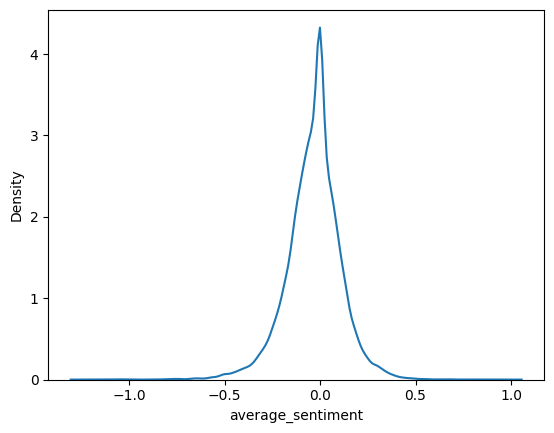

In [94]:
sns.kdeplot(GP['average_sentiment'])

<Axes: xlabel='silence_percent_average', ylabel='Density'>

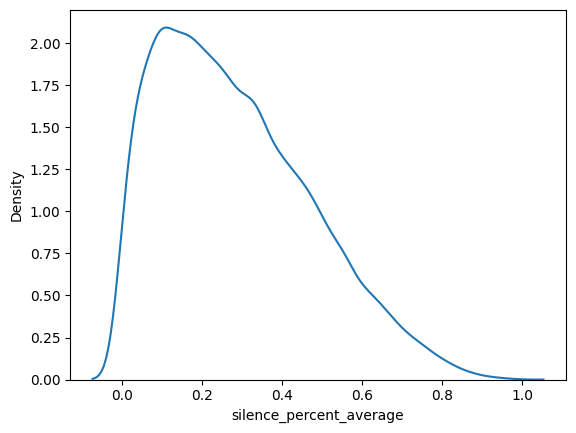

In [95]:
sns.kdeplot(GP['silence_percent_average'])

In [97]:
# Calculating Averge handling time for most frequent reason and least frequent reason.
MFR=GP.groupby('primary_call_reason').agg(
    average_handle_time = ('handle_time','mean'),
    frequency=('handle_time','count')
)

In [103]:
MFR.sort_values('frequency',ascending=False,inplace=True)

In [101]:
MFR['average_handle_time']=MFR['average_handle_time'].dt.components['minutes']

In [105]:
MFR

,average_handle_time,frequency
primary_call_reason,,
IRROPS,19,5718
Voluntary Change,19,4623
Seating,17,2692
Mileage Plus,22,2487
Post Flight,24,1827
Communications,18,1659
Products & Services,17,1414
Baggage,14,1171
Upgrade,15,1163


In [106]:
MFR=df3.groupby('primary_call_reason').agg(
    average_handle_time = ('handle_time','mean'),
    frequency=('handle_time','count')
)

In [107]:
MFR.head()

,average_handle_time,frequency
primary_call_reason,,
Baggage,0 days 00:14:35.741525423,2832
Booking,0 days 00:11:07.963594994,2637
Check In,0 days 00:15:29.968487394,1904
Checkout,0 days 00:29:01.557203389,1888
Communications,0 days 00:17:46.687500,3840


In [108]:
MFR.sort_values('frequency',ascending=False,inplace=True)

In [109]:
MFR

,average_handle_time,frequency
primary_call_reason,,
IRROPS,0 days 00:19:05.197205318,13311
Voluntary Change,0 days 00:19:39.640486725,10848
Seating,0 days 00:17:25.819324430,6365
Mileage Plus,0 days 00:22:36.588617330,5851
Post Flight,0 days 00:25:02.327944572,4330
Communications,0 days 00:17:46.687500,3840
Products & Services,0 days 00:17:29.009603841,3332
Baggage,0 days 00:14:35.741525423,2832
Upgrade,0 days 00:15:30.832724616,2738


In [110]:
MFR['average_handle_time']=MFR['average_handle_time'].dt.components['minutes']

In [111]:
MFR

,average_handle_time,frequency
primary_call_reason,,
IRROPS,19,13311
Voluntary Change,19,10848
Seating,17,6365
Mileage Plus,22,5851
Post Flight,25,4330
Communications,17,3840
Products & Services,17,3332
Baggage,14,2832
Upgrade,15,2738


In [114]:
# Calculating percentage difference most frequent and least frequent reasons.
mfr=MFR.iloc[0]['average_handle_time']
lfr=MFR.iloc[-1]['average_handle_time']

In [119]:
diff=((mfr-lfr)/lfr)*100
print('Percentage difference between average handling times of most frequent and least frequent reasons:',diff,'%')

Percentage difference between average handling times of most frequent and least frequent reasons: -5.0 %


In [121]:
df3.describe()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,average_sentiment,silence_percent_average,elite_level_code,handle_time,waiting_time,agent_call_duration
count,6.665300e+04,6.665300e+04,66653.000000,66653,66653,66653,66552.000000,66653.000000,42694.000000,66653,66653,66653
mean,4.993883e+09,5.006607e+09,564623.782936,2024-08-16 11:00:46.465725440,2024-08-16 11:08:03.437804800,2024-08-16 11:19:40.614525952,-0.033628,0.285446,1.370099,0 days 00:18:54.148800504,0 days 00:07:16.972079276,0 days 00:11:37.176721227
min,1.316420e+05,4.430700e+05,102574.000000,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:17:00,-1.380000,0.000000,0.000000,0 days 00:03:00,0 days 00:03:00,0 days 00:00:00
25%,2.481353e+09,2.514373e+09,347606.000000,2024-08-09 11:25:00,2024-08-09 11:32:00,2024-08-09 11:45:00,-0.110000,0.130000,0.000000,0 days 00:11:00,0 days 00:05:00,0 days 00:04:00
50%,4.987649e+09,5.006072e+09,591778.000000,2024-08-17 09:12:00,2024-08-17 09:19:00,2024-08-17 09:31:00,-0.020000,0.260000,1.000000,0 days 00:15:00,0 days 00:07:00,0 days 00:07:00
75%,7.495496e+09,7.509114e+09,786323.000000,2024-08-24 14:22:00,2024-08-24 14:29:00,2024-08-24 14:40:00,0.050000,0.410000,2.000000,0 days 00:22:00,0 days 00:09:00,0 days 00:15:00
max,9.999806e+09,9.999935e+09,993862.000000,2024-08-31 23:55:00,2024-08-31 23:59:00,2024-09-01 01:33:00,2.670000,0.980000,5.000000,0 days 02:09:00,0 days 00:15:00,0 days 01:59:00
std,2.889665e+09,2.883582e+09,257493.355821,NaN,NaN,NaN,0.143693,0.192104,1.322081,0 days 00:13:04.802043586,0 days 00:02:31.155331103,0 days 00:12:54.326874643


In [126]:
df3[['average_sentiment','waiting_time','handle_time']].corr()

,average_sentiment,waiting_time,handle_time
average_sentiment,1.000000,0.041316,-0.067111
waiting_time,0.041316,1.000000,0.165140
handle_time,-0.067111,0.165140,1.000000


In [134]:
Primary=df3.groupby('primary_call_reason').agg(
    average_sentiment = ('average_sentiment','median')
)

In [135]:
Primary

,average_sentiment
primary_call_reason,
Baggage,0.000
Booking,0.000
Check In,-0.030
Checkout,-0.050
Communications,-0.030
Digital Support,-0.020
Disability,0.000
ETC,-0.040
IRROPS,-0.060


In [136]:
Primary.sort_values('average_sentiment',ascending=False)

,average_sentiment
primary_call_reason,
Baggage,0.000
Booking,0.000
Upgrade,0.000
Unaccompanied Minor,0.000
Traveler Updates,0.000
Seating,0.000
Other Topics,0.000
Disability,0.000
Voluntary Change,0.000


In [137]:
agent_tone=df3.groupby('agent_tone').size()

In [138]:
agent_tone

agent_tone
angry           366
calm          22882
frustrated     3438
neutral       39688
polite           81
dtype: int64

In [139]:
agent_tone=pd.DataFrame(agent_tone)

In [143]:
agent_tone.reset_index(inplace=True)

In [150]:
agent_tone.rename(columns={0:'frequency'},inplace=True)

In [151]:
agent_tone

,agent_tone,frequency
0,angry,366
1,calm,22882
2,frustrated,3438
3,neutral,39688
4,polite,81


<Axes: xlabel='agent_tone', ylabel='frequency'>

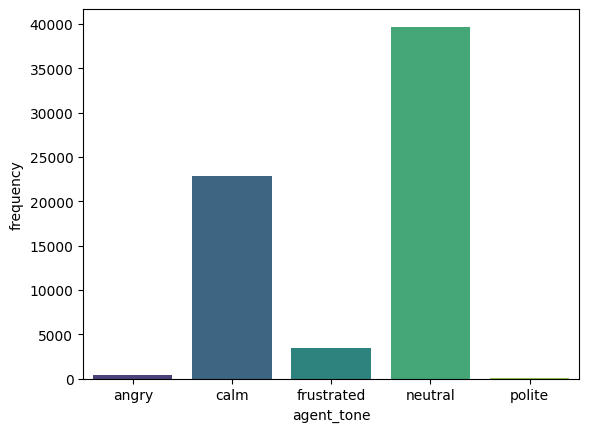

In [152]:
sns.barplot(data=agent_tone,x='agent_tone',y='frequency', palette='viridis')